# TP3 - Solución de Sistemas de Ecuaciones Lineales 
## PARTE 2


1) Dado los siguientes sistemas de ecuaciones y sus correspondientes sistemas perturbados.

    (i) Grafique ambos sistemas en un mismo gráfico y concluya sobre los resultados obtenidos.


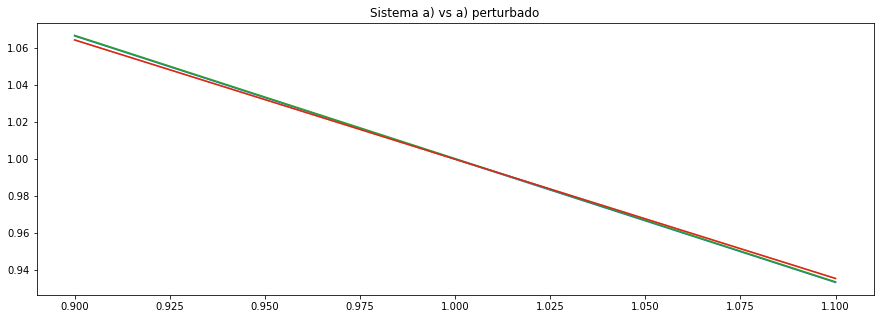

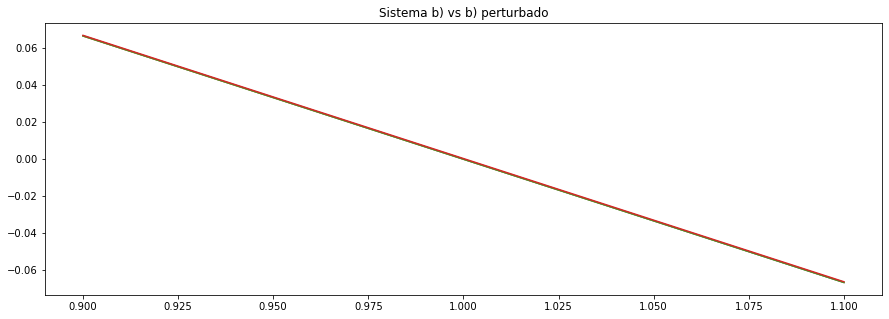

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.9,1.1,100)

y1 = (5 - 2*x)/3
y2 = (5.1 - 2*x)/3.1

y11 = (5.001 - 2*x)/3
y22 = (5.1 - 2*x)/3.1

z1 = (2-2*x)/3
z2 = (1.999-1.999*x)/3

z11 = (2-2*x)/3
z22 = (2-1.999*x)/3

plt.figure(1, (15, 5))
plt.title("Sistema a) vs a) perturbado")
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y11)
plt.plot(x,y22)
# plt.ylim(0.98,1.02)
# plt.xlim(0.999,1.001)
plt.figure(2, (15, 5))
plt.title("Sistema b) vs b) perturbado")
plt.plot(x,z1)
plt.plot(x,z2)
plt.plot(x,z11)
plt.plot(x,z22)

    (ii) ¿Cuál es la relación entre la norma infinito de ambos sistemas con los resultados obtenidos? ¿Cómo afecta el número de condición en este caso?

3) Programe en Python el método Gauss-Seidel para:

    a) Resolver el sistema del punto 2.

In [ ]:
import numpy as np

def seidel(a, b, x0, itmax, eps):
    
    it = 0
    error = eps + 1
    n  = x0.size
    x1 = np.zeros(n)
    print("\nError por cada iteración:")
    
    while it < itmax and error > eps:
        it = it + 1
        for i in range(n):
            suma = 0
            for j in range(i): #-------------desde 0 hasta i-1
                suma = suma + a[i,j]*x1[j]
            for j in range(i+1,n):
                suma = suma + a[i,j]*x0[j]
            x1[i] = (b[i]-suma)/a[i,i]
        error = np.abs(x1-x0).max()
        print(it, ')', '{:<.2e}'.format(error), ' ', end="")
        x0 = x1.copy()
    print("\n\nLa solución es: ", x1)

In [ ]:
eps = 1E-3
it = 10 
a = np.array([[2, -1, 0], [1, 6, -2], [4, -3, 8]])
b = np.array([2, -4, 5])
x = np.array([0, 0, 1])

seidel(a,b,x,it,eps)

    b) Distintos sistemas de ecuaciones lineales (delimitados por ","). Investigue como leer un archivo de texto en Python.

In [ ]:
eps = 1E-3
it = 20 
a = np.loadtxt("Sistema10x10//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema10x10//b.txt", dtype=int)
x = np.loadtxt("Sistema10x10//X.txt", dtype=int)

seidel(a,b,x,it,eps)

In [ ]:
eps = 1E-3
it = 20 
a = np.loadtxt("Sistema50x50//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema50x50//b.txt", dtype=int)
x = np.loadtxt("Sistema50x50//X.txt", dtype=int)

seidel(a,b,x,it,eps)

In [ ]:
eps = 1E-3
it = 20 
a = np.loadtxt("Sistema500x500//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema500x500//b.txt", dtype=int)
x = np.loadtxt("Sistema500x500//X.txt", dtype=int)

seidel(a,b,x,it,eps) #RuntimeWarning: overflow encountered in long_scalars

In [ ]:
eps = 1E-3
it = 20 
a = np.loadtxt("Sistema1000x1000//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema1000x1000//b.txt", dtype=int)
x = np.loadtxt("Sistema1000x1000//X.txt", dtype=int)

seidel(a,b,x,it,eps) #OverflowError: Python int too large to convert to C long

In [ ]:
# eps = 1E-3
# it = 20 
# a = np.loadtxt("Sistema10000x10000//A.txt", delimiter=",", dtype=int)
# b = np.loadtxt("Sistema10000x10000//b.txt", dtype=int)
# x = np.loadtxt("Sistema10000x10000//X.txt", dtype=int)

# seidel(a,b,x,it,eps)

# 5  min por iteración !!!
# 37 min en total !!!!!!!!

Error por cada iteración:
1 ) 1.25e+01  2 ) 4.29e+00  3 ) 8.86e-01  4 ) 5.48e-02  5 ) 1.62e-02  6 ) 2.15e-03  7 ) 3.66e-04  

La solución es:  [-1.07382591e-04 -7.35664961e-05 -6.38898512e-05 ... -2.75656835e-05
 -8.18736839e-06 -1.89537043e-06]

    c) ¿Cómo modificaría el código para implementar el método de Jacobi?
    Uso solamente el vector de la iteración anterior: X0

In [ ]:
import numpy as np

def jacobi(a, b, x0, itmax, eps):
    
    it = 0
    error = eps + 1
    n  = x0.size
    x1 = np.zeros(n)
    print("\nError por cada iteración:")
    
    while it < itmax and error > eps:
        it = it + 1
        for i in range(n):
            suma = 0
            for j in range(i):
                suma = suma + a[i,j]*x0[j] # aquí cambié x1 por x0
            for j in range(i+1,n):
                suma = suma + a[i,j]*x0[j]
            x1[i] = (b[i]-suma)/a[i,i]
        error = np.abs(x1-x0).max()
        print(it, ')', '{:<.2e}'.format(error), ' ', end="")
        x0 = x1.copy()
    print("\n\nLa solución es: ", x1)

In [ ]:
eps = 1E-3
it = 20 
a = np.array([[2, -1, 0], [1, 6, -2], [4, -3, 8]])
b = np.array([2, -4, 5])
x = np.array([0, 0, 1])

jacobi(a,b,x,it,eps)

In [ ]:
eps = 1E-3
it = 300 
a = np.loadtxt("Sistema10x10//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema10x10//b.txt", dtype=int)
x = np.loadtxt("Sistema10x10//X.txt", dtype=int)

jacobi(a,b,x,it,eps)

# 226 iteraciones!??

In [ ]:
eps = 1E-3
it = 40 
a = np.loadtxt("Sistema50x50//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema50x50//b.txt", dtype=int)
x = np.loadtxt("Sistema50x50//X.txt", dtype=int)

jacobi(a,b,x,it,eps)

Nro. de iteraciones para llegar a e < 1E-3
+ <pre>Sistema3x3:     Gauss-Seidel(7)   Gauss-Jacobi(9)</pre>
+ <pre>Sistema10x10:   Gauss-Seidel(16)  Gauss-Jacobi(226)  SOR(13)</pre>
+ <pre>Sistema50x50:   Gauss-Seidel(6)   Gauss-Jacobi(35)</pre>

4) Resuelva el siguiente sistema de ecuaciones lineales programando el método SOR. Pruebe para distintos valores de ω.

In [72]:
import numpy as np

def sor(w, a, b, x0, itmax, eps):
    
    it = 0
    error = eps + 1
    n  = x0.size
    x1 = np.zeros(n)
    
    while it <= itmax and error > eps:
        it = it + 1
        for i in range(n):
            suma = 0
            for j in range(i):
                suma = suma + a[i,j]*x1[j]
            for j in range(i+1,n):
                suma = suma + a[i,j]*x0[j]
            x1[i] = (1-w)*x0[i] + w*((b[i]-suma)/a[i,i]) # w factor de ponderación
        error = np.abs(x1-x0).max()
        x0 = x1.copy()
    print("(",it-1,"it. )"," La solución es: ", x1)

In [73]:
eps = 1E-3
it = 40 
a = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])
b = np.array([24, 30, 24])
x = np.array([0, 0, 1])

In [74]:
sor(0.96,a,b,x,it,eps)

( 21 it. )  La solución es:  [-2.99864979 11.99884941  8.99970585]


In [75]:
sor(1  ,a,b,x,it,eps)

( 19 it. )  La solución es:  [-2.99861034 11.99884195  8.99971049]


In [76]:
sor(1.26,a,b,x,it,eps) # w entre 1.25 y 1.27 

( 8 it. )  La solución es:  [-3.00043958 12.00026938  9.00007108]


In [29]:
eps = 1E-3
it = 40 
a = np.loadtxt("Sistema10x10//A.txt", delimiter=",", dtype=int)
b = np.loadtxt("Sistema10x10//b.txt", dtype=int)
x = np.loadtxt("Sistema10x10//X.txt", dtype=int)

In [30]:
sor(1,a,b,x,it,eps)

( 16 it. )  La solución es:  [-0.94948923  0.22596555 -0.27656651  0.61247982  0.49823969 -0.67046486
  0.25894264  0.0642618   0.7638647  -0.1033692 ]


In [71]:
sor(0.8,a,b,x,it,eps)

( 13 it. )  La solución es:  [-0.94930386  0.22457297 -0.2762115   0.61268621  0.4982628  -0.67055401
  0.25910937  0.06382365  0.76450344 -0.10354676]
